In [107]:
%pip install jupyter pandas sympy
%pip install beautifulsoup4 lxml html5lib
%pip install pint

In [108]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

In [109]:
from modsim import *

This simulation about task management of volunteers .There is 20 total task.Among them 4 is done and 16 is pending

In [110]:
def task_done():
  task.pending-=1
  task.done+=1

In [111]:
def task_done(State):
  if task.pending>0:
    task.pending-=1
    task.done+=1

In [112]:
task=State(done=9,pending=11)
task_done(task_done)

In [113]:
state = task
state.pending -= 1
state.done += 1

In [114]:
show(task)

,state
done,11
pending,9


In [115]:
print(task)

done       11
pending     9
Name: state, dtype: int64


In [116]:
task1=State(done=6,pending=14)
task2=State(done=6,pending=14)


In [117]:
task_done(task1)
task_done(task2)

In [118]:
show(task)

,state
done,13
pending,7


In [119]:
def task_add(State):
  if  State.done<8:
    State.done_empty+=1
    return
  State.done -= 1
  State.pending += 1

In [120]:
show(task)

,state
done,13
pending,7


In [121]:
task = State(done=12, pending=0,
                  done_empty=0)

In [122]:
task_add(task)

In [123]:
show(task)

,state
done,11
pending,1
done_empty,0


In [124]:
task = State(done=12, pending=0,
                  done_empty=0,pending_empty=0)

In [125]:
task_add(task)

In [126]:
show(task)

,state
done,11
pending,1
done_empty,0
pending_empty,0


In [130]:
def task_allocation(State,p1,p2):
  if flip(p1):
    task_add(State)
  if flip(p2):
    task_done(State)

In [132]:
task_allocation(task,5,9)

In [133]:
def task_add(State):
  if  State.done<8:
    State.done_empty+=1
    return
  State.done -= 1
  State.pending += 1


In [134]:
def task_done(State):
  if task.pending>0:
    task.pending-=1
    task.done+=1

In [135]:
task = State(done=12, pending=8,
                  done_empty=4,pending_empty=3)

In [136]:
def run_simulation(State, p1, p2, num_steps):
    # Simulate the given number of time steps.

    # state: State object
    # p1: probability of an Olin->Wellesley customer arrival
    # p2: probability of a Wellesley->Olin customer arrival
    # num_steps: number of time steps
    results = TimeSeries()
    results[0] = state.done

    for i in range(num_steps):
        task_allocation(State,p1,p2)
        results[i+1] = state.done

    results.plot(label="Task")
    decorate(title='Task management',
         xlabel="task allocation",
         ylabel='Task done')

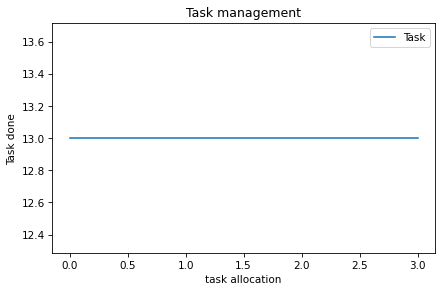

In [137]:
run_simulation(task, 0.7, 0.2, 3)
